# SB 125
## Research Request
### TTTF Route-level Illustrative Examples
#### Issue 1098

Created May 6, 2024
Analysis and write-up completed by Noah Sanchez, requested by Katrina Kaiser to be included on the Freght Efficiency sheet for Cycle 4

## Origin-Destinations
- Napa  
    - Napa High School to Vallejo Ferry Terminal  
- Sacramento  
    - P Street/22nd to 5248 Rose Street  
- Clovis  
    - 9248 N Laureen Ave to Clovis Community Hospital
- Los Angeles  
    - Slauson/5th to Burbank Town Center Mall
- Solano  
    - Vallejo Ferry Terminal to Solano Community College Vallejo

### Analyst Comments:  
Mode of Travel is the same for all records, "All Vehicles LBS Plus - StL (StreetLight) All Vehicles Volume"

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from path_example_vars import GCS_PATH

In [2]:
path = GCS_PATH

In [3]:
# Name the datasets
df01 = f'{path}01_Napa_attri_v1_sa_all.csv'
df02 = f'{path}02_Vallejo_attri_v0_sa_all.csv'
df03 = f'{path}03_Sacramento_attri_v1_sa_all.csv'
df04 = f'{path}04_Clovis_attri_v0_sa_all.csv'
df05 = f'{path}05_Los_Angeles_attri_v0_sa_all.csv'

In [4]:
# create a function to import the data from a csv file
def getData(path):
    # reads in the data from a .csv file
    df = pd.read_csv(path)
    return df

In [5]:
# Pull in data
df01 = getData(df01)
df02 = getData(df02)
df03 = getData(df03)
df04 = getData(df04)
df05 = getData(df05)

In [6]:
# Create a function to remove spaces and make header characters lowercase
def clean_headers(df):
    cleaned_columns = []
    for column in df.columns:
        cleaned_column = column.replace(" ", "").lower()
        cleaned_columns.append(cleaned_column)
    df.columns = cleaned_columns
    return df

In [7]:
# For the headers, the remove the spaces and make the characters lowercase using the clean_headers function
df01 = clean_headers(df01)
df02 = clean_headers(df02)
df03 = clean_headers(df03)
df04 = clean_headers(df04)
df05 = clean_headers(df05)

In [8]:
# adding a column to the datasets called 'city'
df01['city'] = 'Napa'
df02['city'] = 'Solano'
df03['city'] = 'Sacramento'
df04['city'] = 'Clovis'
df05['city'] = 'Los Angeles'

In [9]:
def mph_result_50_auto(data):
    # Calculate the 50th Travel Time Percentile into hours (from seconds)
    ttp_50_auto = data['50thtraveltimepercentile'].sum()/3600

    
    # Filter rows where column ['50thtraveltimepercentile'] is not 'N/A'
    filtered_df = data[data['50thtraveltimepercentile'] != 'N/A']
    
    # Calculate the sum of linezonelenth(miles) column
    segment_length_auto = filtered_df['linezonelength(miles)'].sum()

    
    # Identify the weighted speed
    mph_50_auto = segment_length_auto / ttp_50_auto
     
    return mph_50_auto

In [10]:
def mph_result_95_auto(data):
    # Calculate the 95th Travel Time Percentile into hours (from seconds)
    ttp_95_auto = data['95thtraveltimepercentile'].sum()/3600

    
    # Filter rows where column ['95thtraveltimepercentile'] is not 'N/A'
    filtered_df = data[data['95thtraveltimepercentile'] != 'N/A']
    
    # Calculate the sum of linezonelenth(miles) column
    segment_length_auto = filtered_df['linezonelength(miles)'].sum()

    
    # Identify the weighted speed
    mph_95_auto = segment_length_auto / ttp_95_auto
     
    return mph_95_auto

In [11]:
# Create a 50th percentile MPH results
data01_50_results = pd.DataFrame([mph_result_50_auto(df01)], columns=['MPH_50th_Percentile_results'])
data02_50_results = pd.DataFrame([mph_result_50_auto(df02)], columns=['MPH_50th_Percentile_results'])
data03_50_results = pd.DataFrame([mph_result_50_auto(df03)], columns=['MPH_50th_Percentile_results'])
data04_50_results = pd.DataFrame([mph_result_50_auto(df04)], columns=['MPH_50th_Percentile_results'])
data05_50_results = pd.DataFrame([mph_result_50_auto(df05)], columns=['MPH_50th_Percentile_results'])

In [12]:
# Concatenate the results into a DataFrame called 'corridor_50th_mph'
corridor_50th_mph = pd.concat([data01_50_results,data02_50_results, data03_50_results, data04_50_results, data05_50_results], axis=0)

# Create a list of the cities in the study
city = ['Napa', 'Solano', 'Sacramento', 'Clovis', 'Los Angeles']

# add a column called 'city' and use a for loop to add the city names as values
corridor_50th_mph['city'] = [city[i] for i in range(len(corridor_50th_mph))]

# change the order of the columns in the dataframe
corridor_50th_mph = corridor_50th_mph[['city', 'MPH_50th_Percentile_results']]

In [13]:
# Create a function to plot the results
def plot_df_50(df):
    """
    Plot a DataFrame with two columns on a scatterplot.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    # plot the data
    df.plot(kind='bar', x='city', y='MPH_50th_Percentile_results', legend=False)
    
    # Set plot title and labels
    plt.title('MPH 50th Percentile Results')
    plt.xlabel('City')
    plt.ylabel('MPH')
    
    # Show the plot
    plt.show()

In [14]:
# View a bar chart of the 50th percentile's MPH
#bar_50 = plot_df_50(corridor_50th_mph)

In [15]:
# Create a 95th percentile MPH results
data01_95_results = pd.DataFrame([mph_result_95_auto(df01)], columns=['MPH_95th_Percentile_results'])
data02_95_results = pd.DataFrame([mph_result_95_auto(df02)], columns=['MPH_95th_Percentile_results'])
data03_95_results = pd.DataFrame([mph_result_95_auto(df03)], columns=['MPH_95th_Percentile_results'])
data04_95_results = pd.DataFrame([mph_result_95_auto(df04)], columns=['MPH_95th_Percentile_results'])
data05_95_results = pd.DataFrame([mph_result_95_auto(df05)], columns=['MPH_95th_Percentile_results'])

In [16]:
# Concatenate the results into a DataFrame called 'corridor_50th_mph'
corridor_95th_mph = pd.concat([data01_95_results,data02_95_results, data03_95_results, data04_95_results, data05_95_results], axis=0)

# add a column called 'city' and use a for loop to add the city names as values
corridor_95th_mph['city'] = [city[i] for i in range(len(corridor_50th_mph))]

# change the order of the columns in the dataframe
corridor_95th_mph = corridor_95th_mph[['city', 'MPH_95th_Percentile_results']]

In [17]:
# Create a function to plot the results
def plot_df_95(df):
    """
    Plot a DataFrame with two columns on a scatterplot.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    # plot the data
    df.plot(kind='bar', x='city', y='MPH_95th_Percentile_results', legend=False)
    
    # Set plot title and labels
    plt.title('MPH 95th Percentile Results')
    plt.xlabel('City')
    plt.ylabel('MPH')
    
    # Show the plot
    plt.show()

In [18]:
# View a bar chart of the 95th percentile's MPH
#bar_95 = plot_df_95(corridor_95th_mph)

In [19]:
MPH_results = corridor_50th_mph
MPH_results['MPH_95th_Percentile_results'] = corridor_95th_mph['MPH_95th_Percentile_results']

In [20]:
# Create a function to visualize the 50th and 95th percentiles
def plot_results_both(df):
    """
    Plot totals for both the 50th and 95th MPH percentiles.
    
    Parameters:
        df (Pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    
    # Set the number of categories
    num_categories = 2
    
    # Set bar width
    bar_width = 0.35
    
    # Set x locations for the groups
    index = np.arange(len(df))
    
    # Plot bars for '50th Percentile'
    plt.bar(index, df['MPH_50th_Percentile_results'], bar_width, label='50th Percentile MPH Results')
    
    # Plot bars for '95th Percentile'
    plt.bar(index + bar_width, df['MPH_95th_Percentile_results'], bar_width, label='95th Percentile MPH Results')
    
    # Set plot title and labels
    plt.title('Travel Time Reliability Index MPH Results')
    plt.xlabel('City')
    plt.ylabel('Miles Per Hour')
    plt.xticks(index + bar_width /2, df['city'])
    
    # Display legend
    plt.legend()
    
    # Show the plot
    plt.show()

In [21]:
# Create subset function
df01_ttri = df01[[
    'city',
    'linezonelength(miles)',
    '50thtraveltimepercentile',
    '95thtraveltimepercentile',
]]

df02_ttri = df02[[
    'city',
    'linezonelength(miles)',
    '50thtraveltimepercentile',
    '95thtraveltimepercentile',
]]

df03_ttri = df03[[
    'city',
    'linezonelength(miles)',
    '50thtraveltimepercentile',
    '95thtraveltimepercentile',
]]

df04_ttri = df04[[
    'city',
    'linezonelength(miles)',
    '50thtraveltimepercentile',
    '95thtraveltimepercentile',
]]

df05_ttri = df05[[
    'city',
    'linezonelength(miles)',
    '50thtraveltimepercentile',
    '95thtraveltimepercentile',
]]

In [22]:
def ttri_calcs(df):
    # Suppress warnings
    pd.options.mode.chained_assignment = None # default='warn'
    
    # Multiply the 50th TTP and the 95th TTP
    df['LOTTR'] = df['95thtraveltimepercentile']/df['50thtraveltimepercentile']
    df['Weighted'] = df['LOTTR'] * df['linezonelength(miles)']
    return df

In [23]:
# Create TTRI Columns LOTTR & Weighted
# LOTTR multiplies the 50th travel time percentile values and the 95th travel time percentile values
# Weighted takes the LOTTR values and multiplies them by the segment length values
df01_ttri = ttri_calcs(df01_ttri)
df02_ttri = ttri_calcs(df02_ttri)
df03_ttri = ttri_calcs(df03_ttri)
df04_ttri = ttri_calcs(df04_ttri)
df05_ttri = ttri_calcs(df05_ttri)

In [24]:
def calculate_total(df):
    # Calculate the total of linezonelength(miles)
    total_length = df['linezonelength(miles)'].sum()
    
    # Calculate the total of the Weighted column
    total_weight = df['Weighted'].sum()
    
    # Divide the Weighted total by the Line Length total
    total = total_weight/total_length
    
    # Create a DataFrame to store the result
    result_df = pd.DataFrame({'ATTRI': [total]})
        
    return result_df

In [25]:
# Calculate totals
df01_ttri_result = calculate_total(df01_ttri)
df02_ttri_result = calculate_total(df02_ttri)
df03_ttri_result = calculate_total(df03_ttri)
df04_ttri_result = calculate_total(df04_ttri)
df05_ttri_result = calculate_total(df05_ttri)

In [26]:
# concatenate results
attri = pd.concat([df01_ttri_result, df02_ttri_result, df03_ttri_result, df04_ttri_result, df05_ttri_result], axis=0)
attri

# add a column called 'city' and use a for loop to add the city names as values
attri['city'] = [city[i] for i in range(len(attri))]

# change the order of the columns in the dataframe
attri = attri[['city', 'ATTRI']]

In [27]:
# Create a function to plot the results
def plot_df_attri(df):
    """
    Plot a DataFrame with two columns
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    # plot the data
    df.plot(kind='bar', x='city', y='ATTRI', legend=False)
    
    # Set plot title and labels
    plt.title('Auto Travel Time Reliability Index')
    plt.xlabel('City')
    plt.ylabel('ATTRI')
    
    # Show the plot
    plt.show()

In [28]:
# Create a dataframe called 'Results' that begins with the 'MPH_results' dataframe
Results = MPH_results

# Add a new column to the Results dataframe called 'ATTRI' and fill the values with the values from the ATTRI column in the attri dataframe
Results['ATTRI'] = attri['ATTRI']

# Reorder the columns
Results = Results[['city', 'ATTRI', 'MPH_50th_Percentile_results', 'MPH_95th_Percentile_results']]

In [29]:
# Create a function to total up the ['linezonelength'] column and show the time in minutes for columns ['50thtraveltimepercentile'] and ['95thtraveltimepercentile']
def time_and_length(df):
    # sum columns ['50thtraveltimepercentile'] and ['95thtraveltimepercentile'] and divide by 60
    ttp_time_50 = (df['50thtraveltimepercentile'].sum()/60)
    ttp_time_95 = (df['95thtraveltimepercentile'].sum()/60)
    
    # Total up the linezonelength(miles) column
    total_lzl = df['linezonelength(miles)'].sum()
    
    # Create a new DataFrame with the results
    results_df = pd.DataFrame({
        '50_ttp_minutes': [ttp_time_50],
        '95_ttp_minutes': [ttp_time_95],
        'segment_length_(miles)': [total_lzl]
    }, index=[0]) # Index 0 indicates one record
    
    return results_df

In [30]:
# Create dataframes showing length of the segments and the travel time over the segments
df01_timeLength = time_and_length(df01)
df02_timeLength = time_and_length(df02)
df03_timeLength = time_and_length(df03)
df04_timeLength = time_and_length(df04)
df05_timeLength = time_and_length(df05)

In [31]:
# Concatenate teh dataframes
timeLength = pd.concat([df01_timeLength, df02_timeLength, df03_timeLength, df04_timeLength, df05_timeLength])

# Reorder the columns
timeLength = timeLength[['segment_length_(miles)', '50_ttp_minutes', '95_ttp_minutes']]

In [32]:
# Resetting index to make sure it's unique
Results.reset_index(drop=True, inplace=True)
timeLength.reset_index(drop=True, inplace=True)

# Join dataframes
results_joined = Results.join(timeLength)

# Reorder the columns
results_joined = results_joined[['city', 'ATTRI', 'segment_length_(miles)', 'MPH_50th_Percentile_results', '50_ttp_minutes', 'MPH_95th_Percentile_results', '95_ttp_minutes']]

In [33]:
# Create a function to plot the results
def plot_length(df):
    """
    Plot a DataFrame with two columns on a bar chart
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    # plot the data
    df.plot(kind='bar', x='city', y='segment_length_(miles)', legend=False)
    
    # Set plot title and labels
    plt.title('Segment Length Miles')
    plt.xlabel('City')
    plt.ylabel('Miles')
    
    # Show the plot
    plt.show()

# Create a function to plot the results
def plot_time_50(df):
    """
    Plot a DataFrame with two columns on a bar chart
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    # plot the data
    df.plot(kind='bar', x='city', y='MPH_50th_Percentile_results', legend=False)
    
    # Set plot title and labels
    plt.title('50_ttp_minutes')
    plt.xlabel('City')
    plt.ylabel('Time (Minutes)')
    
    # Show the plot
    plt.show()    

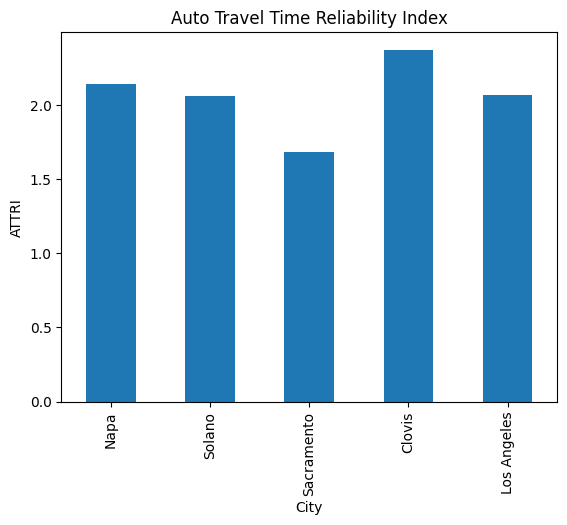

In [34]:
# Display a bar chart of the ATTRI
plot_df_attri(attri)

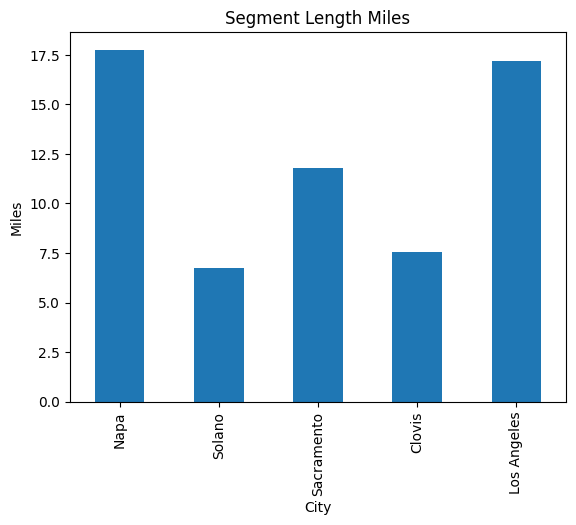

In [35]:
# Display a bar chart showing the length of the corridors
plot_length(results_joined)

In [36]:
# Create a function to visualize the 50th and 95th percentiles
def plot_results_both_minutes(df):
    """
    Plot totals for both the 50th and 95th MPH percentiles.
    
    Parameters:
        df (Pandas.DataFrame): The DataFrame containing the data to be plotted.
    """
    
    # Set the number of categories
    num_categories = 2
    
    # Set bar width
    bar_width = 0.35
    
    # Set x locations for the groups
    index = np.arange(len(df))
    
    # Plot bars for '50th Percentile'
    plt.bar(index, df['50_ttp_minutes'], bar_width, label='50th Percentile Time (minutes)')
    
    # Plot bars for '95th Percentile'
    plt.bar(index + bar_width, df['95_ttp_minutes'], bar_width, label='95th Percentile Time (minutes)')
    
    # Set plot title and labels
    plt.title('Travel Time Reliability Index Time Results (Minutes)')
    plt.xlabel('City')
    plt.ylabel('Minutes')
    plt.xticks(index + bar_width /2, df['city'])
    
    # Display legend
    plt.legend()
    
    # Show the plot
    plt.show()

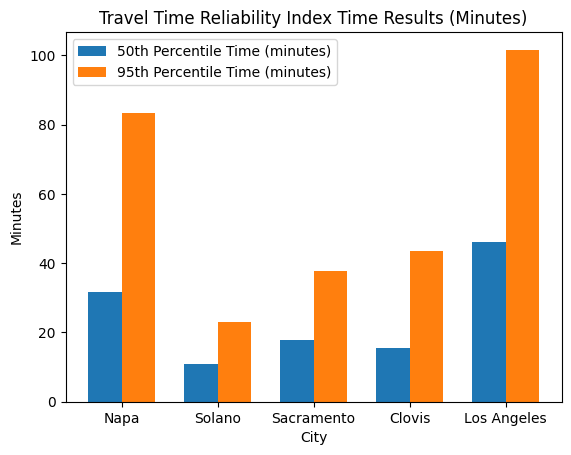

In [37]:
# Show the time for the 50th Percentile in Minutes
plot_results_both_minutes(results_joined)

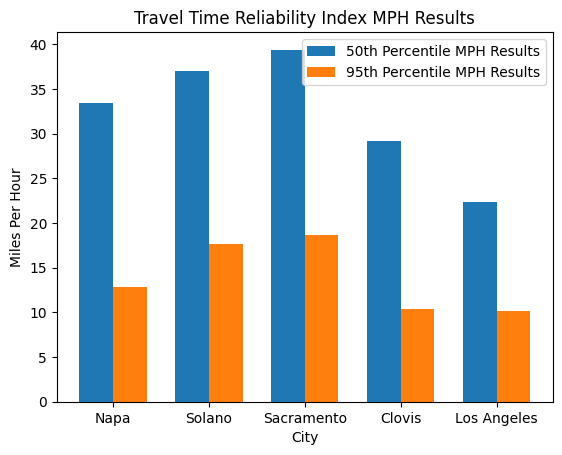

In [38]:
# Show the MPH results in a bar chart
plot_results_both(MPH_results)

In [39]:
results_joined.to_parquet(f'{GCS_PATH}streetlight_results.parquet')

In [40]:
results_joined

,city,ATTRI,segment_length_(miles),MPH_50th_Percentile_results,50_ttp_minutes,MPH_95th_Percentile_results,95_ttp_minutes
0,Napa,2.137685,17.765,33.483770,31.833333,12.803604,83.250000
1,Solano,2.057293,6.746,37.077252,10.916667,17.662255,22.916667
2,Sacramento,1.678837,11.767,39.405767,17.916667,18.702517,37.750000
3,Clovis,2.371952,7.551,29.229677,15.500000,10.435163,43.416667
4,Los Angeles,2.063605,17.181,22.369476,46.083333,10.139607,101.666667
